In [1]:
pip install --no-cache-dir ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 210.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 267.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 269.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 144.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 185.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 190.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 258.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 225.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unin

In [6]:
!pip install ultralytics opencv-python-headless torch matplotlib roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [8]:
pip install numpy opencv-python matplotlib pandas seaborn


0: 416x640 15 bottles, 2316.7ms
Speed: 3.9ms preprocess, 2316.7ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 640)

0: 448x640 1 person, 3 horses, 2549.2ms
Speed: 3.7ms preprocess, 2549.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 4 zebras, 2379.0ms
Speed: 3.8ms preprocess, 2379.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 3 elephants, 3276.2ms
Speed: 4.8ms preprocess, 3276.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)

0: 352x640 1 person, 1 bicycle, 2053.2ms
Speed: 3.3ms preprocess, 2053.2ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 2 cars, 1 truck, 2041.8ms
Speed: 3.4ms preprocess, 2041.8ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)


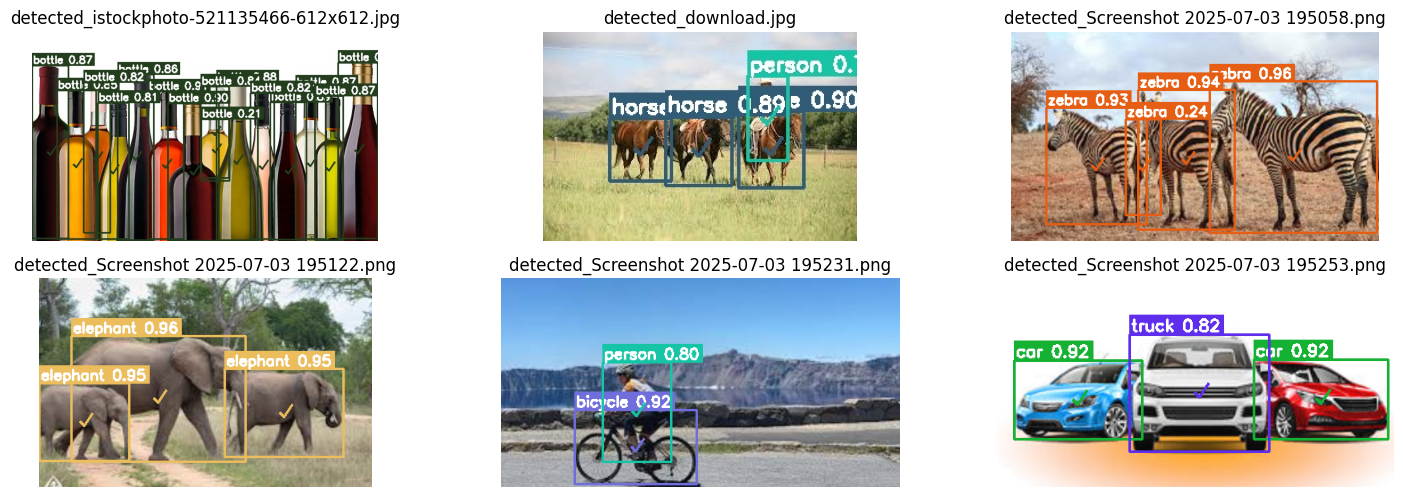

In [33]:
import os

import cv2

import torch

import logging

import numpy as np

import matplotlib.pyplot as plt

from ultralytics import YOLO


logging.basicConfig(

    level=logging.INFO,

    format="%(asctime)s - %(levelname)s - %(message)s"
)


image_paths_list = [

    "/content/istockphoto-521135466-612x612.jpg", "/content/download.jpg" , "/content/Screenshot 2025-07-03 195058.png",

      "/content/Screenshot 2025-07-03 195122.png" , "/content/Screenshot 2025-07-03 195231.png" ,

    "/content/Screenshot 2025-07-03 195253.png"

]

def make_palette_var(class_id_list, seed_var=42):

    rng_var = np.random.default_rng(seed_var)

    palette_var = {}

    for cid_var in class_id_list:

        color_tuple = tuple(int(c) for c in rng_var.integers(0, 255, size=3))

        palette_var[cid_var] = color_tuple

    return palette_var

def draw_checkmark_var(image_var, center_var, color_var=(0,255,0), thickness_var=2, size_var=10):

    x_var, y_var = center_var

    pts_var = np.array([

        [x_var - size_var//2, y_var],

        [x_var, y_var + size_var//2],

        [x_var + size_var, y_var - size_var]

    ], np.int32).reshape((-1,1,2))

    cv2.polylines(image_var, [pts_var], isClosed=False, color=color_var, thickness=thickness_var)

def detect_objects_var(

    model_var,

    image_path_var,

    class_colors_var,

    confidence_thresh_var=0.2,

    output_dir_var="output",

    draw_centers_var=True
):

    try:
        os.makedirs(output_dir_var, exist_ok=True)

        img_bgr_var = cv2.imread(image_path_var)

        if img_bgr_var is None:

            logging.warning(f"Could not load image: {image_path_var}")

            return None

        img_rgb_var = cv2.cvtColor(img_bgr_var, cv2.COLOR_BGR2RGB)

        height_var, width_var = img_rgb_var.shape[:2]

        results_var = model_var(

            img_rgb_var,

            conf=confidence_thresh_var,

            imgsz=640,

            augment=True,

            agnostic_nms=True,

            device=model_var.device
        )

        counts_var = {}

        res_index_var = 0

        while res_index_var < len(results_var):

            res_var = results_var[res_index_var]

            boxes_var = res_var.boxes.xyxy.cpu().numpy()

            confs_var = res_var.boxes.conf.cpu().numpy()


            cls_ids_var = res_var.boxes.cls.cpu().numpy().astype(int)

            box_idx_var = 0

            while box_idx_var < len(boxes_var):

                box_var = boxes_var[box_idx_var]

                conf_var = confs_var[box_idx_var]

                cid_var = cls_ids_var[box_idx_var]

                counts_var[cid_var] = counts_var.get(cid_var, 0) + 1

                x1_var, y1_var, x2_var, y2_var = map(int, box_var)

                x1_var, y1_var = max(0, x1_var), max(0, y1_var)

                x2_var, y2_var = min(width_var-1, x2_var), min(height_var-1, y2_var)

                class_name_var = model_var.names[cid_var]

                color_var = class_colors_var[cid_var]


                cv2.rectangle(

                    img_rgb_var,

                    (x1_var, y1_var), (x2_var, y2_var),

                    color_var, 2
                )


                label_text_var = f"{class_name_var} {conf_var:.2f}"

                (text_w_var, text_h_var), _ = cv2.getTextSize(

                    label_text_var,

                    cv2.FONT_HERSHEY_SIMPLEX,

                    0.6, 2
                )

                cv2.rectangle(

                    img_rgb_var,

                    (x1_var, y1_var - text_h_var - 8),

                    (x1_var + text_w_var + 4, y1_var),

                    color_var, -1
                )

                cv2.putText(

                    img_rgb_var,

                    label_text_var,

                    (x1_var + 2, y1_var - 4),

                    cv2.FONT_HERSHEY_SIMPLEX,

                    0.6, (255,255,255), 2
                )


                if draw_centers_var:

                    cx_var = (x1_var + x2_var) // 2

                    cy_var = (y1_var + y2_var) // 2

                    draw_checkmark_var(img_rgb_var, (cx_var, cy_var), color_var)

                box_idx_var = box_idx_var + 1

            res_index_var = res_index_var + 1


        summary_list_var = []

        for cid_var, cnt_var in counts_var.items():

            summary_list_var.append(f"{model_var.names[cid_var]}:{cnt_var}")

        summary_var = ", ".join(summary_list_var) or "None"

        logging.info(f"Detections in {os.path.basename(image_path_var)} => {summary_var}")

        out_path_var = os.path.join(

            output_dir_var,

            f"detected_{os.path.basename(image_path_var)}"
        )

        cv2.imwrite(

            out_path_var,

            cv2.cvtColor(img_rgb_var, cv2.COLOR_RGB2BGR)
        )

        return out_path_var

    except Exception as error_var:

        logging.error(f"Error processing {image_path_var}: {error_var}")

        return None

def main_var():

    confidence_threshold_var = 0.2

    merged_output_dir_var = "merged_detections"

    device_var = "cuda" if torch.cuda.is_available() else "cpu"

    model_var = YOLO("yolov8m.pt").to(device_var)

    logging.info(f"Loaded YOLOv8 on {device_var}, classes: {model_var.names}")

    palette_var = make_palette_var(model_var.names)

    results_var = []

    idx_var = 0

    while idx_var < len(image_paths_list):

        current_path_var = image_paths_list[idx_var]

        logging.info(f"Processing {idx_var+1}/{len(image_paths_list)}: {os.path.basename(current_path_var)}")

        out_file_var = detect_objects_var(

            model_var,

            current_path_var,

            class_colors_var = palette_var,

            confidence_thresh_var = confidence_threshold_var,

            output_dir_var = merged_output_dir_var,

            draw_centers_var = True
        )

        if out_file_var:

            results_var.append(out_file_var)

        idx_var = idx_var + 1


    if results_var:

        plt.figure(figsize=(15, 10))

        disp_idx_var = 0

        while disp_idx_var < len(results_var):

            result_fp_var = results_var[disp_idx_var]

            img_disp_var = cv2.cvtColor(cv2.imread(result_fp_var), cv2.COLOR_BGR2RGB)

            plt.subplot(4, 3, disp_idx_var+1)

            plt.imshow(img_disp_var)

            plt.axis('off')

            plt.title(os.path.basename(result_fp_var))

            disp_idx_var = disp_idx_var + 1

        plt.tight_layout()

        plt.show()

if __name__ == "__main__":

    main_var()